In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import tensorflow as tf

In [2]:
n_pts = 500

centers = [[-1,1] , [-1,-1], [1,-1]]
X,y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers , cluster_std=0.4)
X.shape,y.shape

((500, 2), (500,))

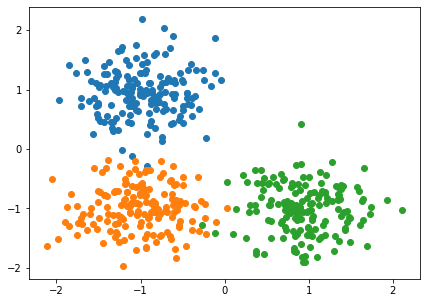

In [3]:
centers = [[-1,1] , [-1,-1], [1,-1]]

plt.figure(figsize = (7,5))

plt.scatter(X[y == 0, 0], X[y==0, 1])
plt.scatter(X[y == 1, 0], X[y==1, 1])
plt.scatter(X[y == 2, 0], X[y==2, 1])

plt.show()

In [4]:
pd.Series(y).unique()

array([2, 0, 1])

In [5]:
y_cat = tf.keras.utils.to_categorical(y,3)
y_cat.shape

(500, 3)

In [6]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 3, input_shape = (2,), activation = "softmax"))

model.compile(tf.keras.optimizers.Adam(learning_rate = 0.2), loss = "categorical_crossentropy", metrics = ["accuracy"])

h = model.fit(X,y_cat, verbose = 1, epochs = 100, batch_size = 50)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.2734 - accuracy: 0.9540
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0630 - accuracy: 0.9860
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0451 - accuracy: 0.9880
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9880
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9900
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.9880
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9880
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9880
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9900
Epoch 11/

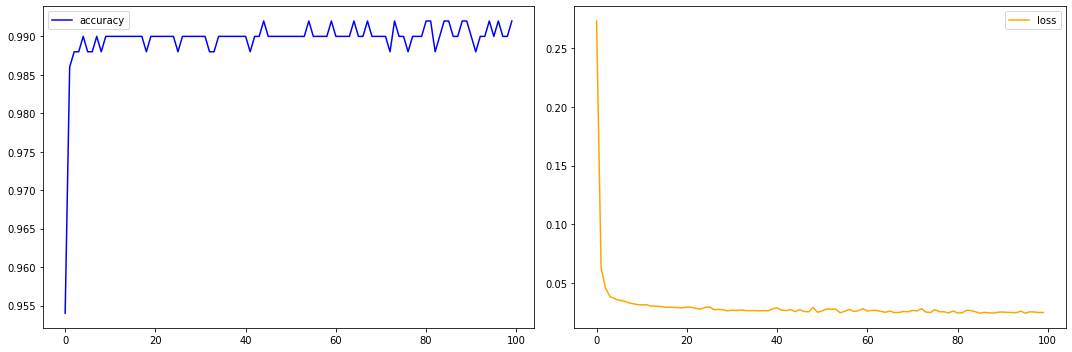

In [7]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(h.history["accuracy"], label = "accuracy",color ="blue") 
plt.legend(loc = "best")

plt.subplot(122)
plt.plot(h.history["loss"], label = "loss",color = "orange") 
plt.legend(loc = "best")

plt.tight_layout()
plt.show()

In [11]:
def plot_decision_boundary(X,y_cat,model):

    x_span = np.linspace(min(X[:, 0 ]) - 1 , max(X[:, 0]) + 1, 50)
    y_span = np.linspace(min(X[:, 0 ]) - 1 , max(X[:, 0]) + 1, 50)

    xx, yy = np.meshgrid(x_span,y_span)

    xx_,yy_ = xx.ravel(),yy.ravel()

    grid = np.c_[xx_,yy_]

    pred_func = model.predict(grid)
    pred_func = np.argmax(pred_func, axis = 1)

    z = pred_func.reshape(xx.shape)

    plt.contourf(xx,yy,z)

Prediction is : 2


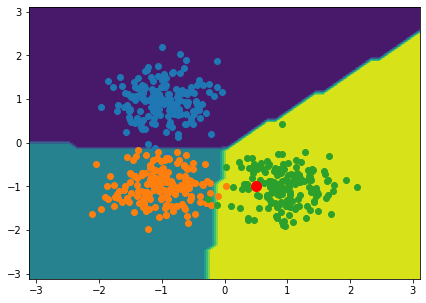

In [12]:
plt.figure(figsize = (7,5))

plot_decision_boundary(X,y_cat, model)

plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])

x = 0.5
y = -1

points = np.array([[x,y]])
pred = np.argmax(model.predict(points))

plt.plot([x],[y],marker = "o",markersize = 10, color = "red")
print("Prediction is :",pred)

plt.show()